<a href="https://colab.research.google.com/github/reallylongaddress/Kaggle/blob/main/playground-series-s3e1/playground_series_s3e1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From: https://www.kaggle.com/competitions/playground-series-s3e1/overview

0.56718 - Best score (submitted after competition completion)

0.01489 - behind leading submission based on Root Mean Squared Error (RMSE)

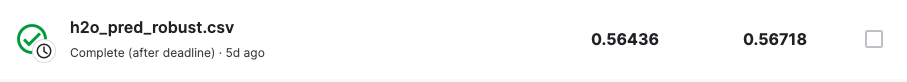

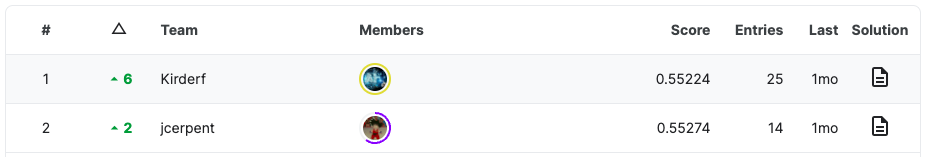




# Setup

In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [ ]:
# ! pip install h2o

In [ ]:
data_path = ''

#kaggle
if (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')) or (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == 'Interactive') or (os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == 'Batch'):
    print("Kaggle Environment")  
    data_path = '/kaggle/input'    
    
#google colab
elif 'google.colab' in sys.modules:
    print('Google Colab Environment')

    from google.colab import drive
    
    drive = drive.mount('/content/drive/')
    data_path = f'/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e1'
    
#localhost
elif os.environ.get('KAGGLE_KERNEL_RUN_TYPE','') == '':
    print('Localhost Environment')
    data_path = './data'
  

Google Colab Environment
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e1/train.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e1/test.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e1/nn_pred.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e1/y_baseline_output.csv
/content/drive/My Drive/Colab_Data/kaggle/playground-series-s3e1/h2o_pred_robust.csv


# EDA

In [ ]:
train_df = pd.read_csv(f'{data_path}/train.csv', index_col='id')
train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
id,,,,,,,,,
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...
37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387


In [ ]:
train_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
test_df = pd.read_csv(f'{data_path}/test.csv', index_col='id')
test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,,,,,,,,
37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29
...,...,...,...,...,...,...,...,...
61891,2.2875,34.0,3.914729,1.085271,866.0,2.071429,34.44,-119.75
61892,3.0781,33.0,4.771971,1.038674,1628.0,2.326848,34.09,-117.96
61893,2.6961,14.0,4.593960,1.170380,3900.0,2.540034,37.51,-120.83


In [ ]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


# Modelling

## Baseline Model

In [ ]:
# split into train and validation sets
X_train = train_df.copy().drop(columns=['MedHouseVal'])
y_train = train_df.copy()['MedHouseVal']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


### Build a configurable preprocessor function

In [ ]:
contamination = 0.3
def removeoutliers(_X_train, _y_train, _X_val, _y_val):

  X_train = _X_train.copy()
  y_train = _y_train.copy()
  X_val = _X_val.copy()
  y_val = _y_val.copy()

  # fit the model
  model = LinearRegression()
  # model = best_model_h2o.fit(h2o.H2OFrame(X_train_scaled_2), h2o.H2OFrame(pd.DataFrame(y_train)))
  model.fit(_X_train, _y_train)

  # evaluate the model
  yhat_full = model.predict(_X_val)

  # evaluate predictions
  iso_rmse_full = mean_squared_error(y_val, yhat_full, squared=False)
  print(f'removeoutliers val rmse (full): {iso_rmse_full}')

  # summarize the shape of the updated training dataset
  print(X_train.shape)

  # identify outliers in the training dataset
  iso = IsolationForest(contamination=contamination)
  yhat = iso.fit_predict(X_train, y_train)

  # select all rows that are not outliers
  mask = yhat != -1
  X_train_trimmed, y_train_trimmed = X_train[mask], y_train[mask]

  # summarize the shape of the updated training dataset
  print(X_train_trimmed.shape)
  print(f'removeoutliers trimmed: {X_train.shape[0] - X_train_trimmed.shape[0]}')

  # fit the model
  model = LinearRegression()
  model.fit(X_train_trimmed, y_train_trimmed)

  # evaluate the model
  yhat_trimmed = model.predict(X_val)

  # evaluate predictions
  iso_rmse_trimmed = mean_squared_error(y_val, yhat_trimmed, squared=False)
  print(f'removeoutliers val rmse (removed outliers from train): {iso_rmse_trimmed}')

  X_train = X_train_trimmed.copy()
  y_train = y_train_trimmed.copy()
  # print(f'type: >>{type(y_train)}<<')

  return X_train, y_train

def scaleFeatures(X_train, X_val, X_test):

  X_train_scaled = X_train.copy()
  X_val_scaled = X_val.copy()
  X_test_scaled = X_test.copy()
  # print(f'scaleFeatures A: {X_train.shape}:{X_val.shape}:{X_test.shape}')
  # print(f'scaleFeatures A: {X_train.columns}')
  # print(f'scaleFeatures A: {X_test.columns}')

  mixed_scalers = True
  if mixed_scalers:

    standard_features = ['HouseAge', 'Latitude', 'Longitude']
    standard_scaler = StandardScaler()
    standard_scaler.fit(X_train[standard_features])

    X_train_scaled[standard_features] = standard_scaler.transform(X_train[standard_features])
    X_val_scaled[standard_features] = standard_scaler.transform(X_val[standard_features])
    X_test_scaled[standard_features] = standard_scaler.transform(X_test[standard_features])

    robust_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population']
    robust_scaler = RobustScaler()
    robust_scaler.fit(X_train[robust_features])

    X_train_scaled[robust_features] = robust_scaler.transform(X_train[robust_features])
    X_val_scaled[robust_features] = robust_scaler.transform(X_val[robust_features])
    X_test_scaled[robust_features] = robust_scaler.transform(X_test[robust_features])

  else:

    scaler = StandardScaler()
    # scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

  return X_train_scaled, X_val_scaled, X_test_scaled

def getCleanData(remove_outliers=True, scale_features=True):

  # split into train and validation sets
  X_train = train_df.copy().drop(columns=['MedHouseVal'])
  y_train = train_df.copy()['MedHouseVal']

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
  X_test = test_df.copy()

  if remove_outliers:
    #only remove outliers from train
    X_train, y_train = removeoutliers(X_train, y_train, X_val, y_val)    

  if scale_features:
    X_train, X_val, X_test = scaleFeatures(X_train, X_val, X_test)    

  return X_train, y_train, X_val, y_val, X_test

X_train, y_train, X_val, y_val, X_test = getCleanData(remove_outliers=True, scale_features=True)


removeoutliers val rmse (full): 0.7379188242913195
(29709, 8)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(17825, 8)
removeoutliers trimmed: 11884
removeoutliers val rmse (removed outliers from train): 0.7244858455937068


In [ ]:
# X_train

In [ ]:
# X_val

In [ ]:
# X_test

In [ ]:
# print(f'{X_train.shape}, {y_train.shape}, {X_val.shape}, {y_val.shape}, {X_test.shape}')

In [ ]:
#assume mean train price for all MedHouseVal
train_mean_price = y_train.mean()
print(train_mean_price)

y_pred_train_baseline = np.full((X_train.shape[0], 1), train_mean_price, dtype=float)
y_pred_val_baseline = np.full((X_val.shape[0], 1), train_mean_price, dtype=float)
y_pred_test_baseline = np.full((test_df.shape[0], 1), train_mean_price, dtype=float)

y_pred_test_baseline.shape, y_pred_val_baseline.shape

2.0319205610098177


((24759, 1), (7428, 1))

In [ ]:
# print(f'y_val:{type(y_val)}::{y_val.shape}, y_pred_val_baseline:{type(y_pred_val_baseline)}::{y_pred_val_baseline.shape}')
val_baseline_rmse = mean_squared_error(y_val, y_pred_val_baseline, squared=False)
print(f'val_baseline_rmse: {val_baseline_rmse}')

val_baseline_rmse: 1.1651827531403773


In [ ]:
#build the baseline submission for test set to get score
y_baseline_output = pd.DataFrame({'id':test_df.index, 'MedHouseVal':y_pred_test_baseline[:,0]})
y_baseline_output
y_baseline_output.to_csv(f'{data_path}/y_baseline_output.csv', index=False)
# Score: 1.15399

## H2O AutoML

In [ ]:
X_train, y_train, X_val, y_val, X_test = getCleanData(remove_outliers=True, scale_features=True)
X_test

removeoutliers val rmse (full): 0.7379188242913195
(29709, 8)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(17825, 8)
removeoutliers trimmed: 11884
removeoutliers val rmse (removed outliers from train): 0.7243539238821053


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
id,,,,,,,,
37137,-1.087071,0.970354,-0.063338,0.740617,-0.080054,2.844411,2.377860,-1.418459
37138,-1.273025,-0.357566,-0.679246,0.769115,1.246947,3.180218,-0.707365,0.564279
37139,2.429390,-0.459713,1.646139,-1.574688,0.214383,2.888889,-0.888223,0.831615
37140,0.652243,2.400422,-0.218767,-0.069946,-0.909091,1.743590,-0.590339,0.536432
37141,-0.255424,-0.051123,-1.012539,0.489180,4.530529,2.003827,-0.590339,0.564279
...,...,...,...,...,...,...,...,...
61891,-0.747149,0.868207,-0.894450,0.550555,-0.693351,2.071429,-0.446717,-0.248866
61892,-0.284837,0.766059,-0.216970,-0.235431,0.340570,2.326848,-0.632894,0.748072
61893,-0.508216,-1.174747,-0.357653,1.986139,3.423338,2.540034,1.186325,-0.850371


In [ ]:
# ! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
do_automl = True
aml = None

if do_automl:
    import h2o
    from h2o.automl import H2OAutoML
    h2o.init()
    aml = H2OAutoML(max_models=30,
                    # balance_classes=False, 
                    # exploitation_ratio=.1,
                    stopping_metric = 'rmse', 
                    stopping_rounds = 3,
                    exclude_algos = ['DeepLearning']
                   )

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,23 mins 40 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_unknownUser_stz959
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.685 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
def _convert_h2oframe_to_numeric(h2o_frame, training_columns):
    for column in training_columns:
        h2o_frame[column] = h2o_frame[column].asnumeric()
    return h2o_frame

if do_automl:

    X_train_with_target = X_train.merge(y_train.to_frame(), left_index=True, right_index=True)
    X_train_with_target = h2o.H2OFrame(X_train_with_target)
    X_train_with_target = _convert_h2oframe_to_numeric(X_train_with_target, X_train_with_target.columns)
    
    X_val_with_target = X_val.merge(y_val.to_frame(), left_index=True, right_index=True)
    X_val_with_target = h2o.H2OFrame(X_val_with_target)
    X_val_with_target = _convert_h2oframe_to_numeric(X_val_with_target, X_val_with_target.columns)
    
    aml.train(training_frame=X_train_with_target, y='MedHouseVal', validation_frame=X_val_with_target)
    
    lb = aml.leaderboard
    lb.head(rows=lb.nrows)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
13:23:51.122: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
if do_automl:

    # best_model_h2o = predict(test)
    print(f'X_val_with_target.shape: {X_val_with_target.shape}')
    best_model_predict = aml.leader.predict(X_val_with_target)
    print(f'best_model_predict.shape: {best_model_predict.shape}')

    y_val_pred = best_model_predict.as_data_frame()
    print(f'y_val_pred.shape: {y_val_pred.shape}')

    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    print(f'val_rmse: {val_rmse}')    


X_val_with_target.shape: (7428, 9)
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
best_model_predict.shape: (7428, 1)
y_val_pred.shape: (7428, 1)
val_rmse: 0.5936199283138895


In [ ]:
print(f'{X_train.shape}, {y_train.shape}, {X_val.shape}, {y_val.shape}, {X_test.shape}')

(17825, 8), (17825,), (7428, 8), (7428,), (24759, 8)


In [ ]:
if do_automl:
        
    y_pred_best_model = aml.leader.predict(h2o.H2OFrame(X_test))
    # y_pred_best_model = best_model_h2o.predict(h2o.H2OFrame(X_test))
    y_pred_best_model_df = y_pred_best_model.as_data_frame()
    y_pred_best_model_df.columns = ['MedHouseVal']
    y_pred_best_model_df['id'] = test_df.index  
    
    y_pred_best_model_df.to_csv(f'{data_path}/h2o_pred_robust.csv', index=False)
    
    print('RESULT (NO SCALING - 10 models): score: 0.56811, Private score: 0.56553')
    print('RESULT (MinMaxScaler - 3 models): Score: 0.57088 Private score: 0.5686')
    print('RESULT (RobustScaler - 3 models): Score: 0.57224 Private score: 0.56822')
    print('RESULT (RobustScaler - 10 models): Score: 0.56718 Private score: 0.56436 - BEST')    
    print('RESULT (New Pipeline - StandardScaler, contamination=.1 - 10 models): Score: 0.80442 Private score: 0.80826')    
    print('RESULT (New Pipeline - RobustScaler, contamination=.3 - 10 models): Score: 0.60948 Private score: 0.60806')    
    print('RESULT (New Pipeline - StandardScaler, contamination=.3 - 10 models): Score: 0.5774 Private score: 0.57641')
    print('RESULT (New Pipeline - StandardScaler, contamination=.4 - 10 models):Score: 0.58233 Private score: 0.5822')
    print('RESULT (New Pipeline - RobustScaler, contamination=.4 - 10 models): Score: 0.58539 Private score: 0.58402')
    print('RESULT (New Pipeline - StandardScaler, contamination=.2 - 10 models): Score: 0.57544 Private score: 0.5716')
    print('RESULT (New Pipeline - StandardScaler, contamination=.2 - 20 models): Score: 0.57483 Private score: 0.5716')
    print('RESULT (New Pipeline - Mixed Scalers, contamination=.2 - 10 models): Score: 0.57812 Private score: 0.57477')
    print('RESULT (New Pipeline - Mixed Scalers, contamination=.3 - 10 models): Score: 0.57759 Private score: 0.57405')
    print('RESULT (New Pipeline - Mixed Scalers, contamination=.4 - 10 models): Score: 0.58796 Private score: 0.58591')
    print('RESULT (New Pipeline - Mixed Scalers, contamination=.3 - 30 models): Score: 0.58397 Private score: 0.58394')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
RESULT (NO SCALING - 10 models): score: 0.56811, Private score: 0.56553
RESULT (MinMaxScaler - 3 models): Score: 0.57088 Private score: 0.5686
RESULT (RobustScaler - 3 models): Score: 0.57224 Private score: 0.56822
RESULT (RobustScaler - 10 models): Score: 0.56718 Private score: 0.56436 - BEST
RESULT (New Pipeline - StandardScaler, contamination=.1 - 10 models): Score: 0.80442 Private score: 0.80826
RESULT (New Pipeline - RobustScaler, contamination=.3 - 10 models): Score: 0.60948 Private score: 0.60806
RESULT (New Pipeline - StandardScaler, contamination=.3 - 10 models): Score: 0.5774 Private score: 0.57641
RESULT (New Pipeline - StandardScaler, contamination=.4 - 10 models):Score: 0.58233 Private score: 0.5822
RESULT (New Pipeline - RobustScaler, contamination=.4 - 10 models): Score: 0.58539 Priva

In [ ]:
# aml.leader.describe()

## Neural Network

This didn't perform well, at all.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import cast
from tensorflow.keras.metrics import RootMeanSquaredError

do_ml = False

if do_ml:
  def initialize_model():
      model = models.Sequential()
      
      model.add(layers.Dense(25, activation='relu', input_dim=X_train_scaled.shape[-1]))
      # model.add(layers.Dropout(.1))
      model.add(layers.Dense(25, activation='relu'))
      # model.add(layers.Dropout(.1))
      # model.add(layers.Dense(25, activation='relu'))
      # model.add(layers.Dropout(.1))
      model.add(layers.Dense(1, activation='linear'))
        
      return model

  def compile_model(model, name):
      
      model.compile(loss='mse',
                  optimizer=name,
                  metrics=[RootMeanSquaredError()])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

if do_ml:
  best_test_rmse = None
  best_nn_model = None
  optimizers = ['adam']#, 'sgd', 'adadelta', 'adagrad', 'rmsprop']

  y_train_tensor = tf.cast(y_train , dtype=tf.float32)
  y_val_tensor = tf.cast(y_val , dtype=tf.float32)

  for optimizer in optimizers:
      model = initialize_model()

      # optimizer = 'adam'
      compile_model(model, optimizer)

      #optimize for validation error
      es = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_root_mean_squared_error')

      history = model.fit(X_train_scaled, 
                          y_train_tensor,
                          validation_data=(X_val_scaled, y_val_tensor),
                          epochs=50,
                          batch_size=16,
                          callbacks = [es],
                          verbose=1,
                        )
          
      test_rmse = model.evaluate(X_val_scaled, y_val_tensor)[1]
      if (best_test_rmse is None) or (test_rmse > best_test_rmse):
          best_test_rmse = test_rmse
          best_nn_model = model

      print(f'{optimizer}:: train_root_mean_squared_error: {np.mean(history.history["root_mean_squared_error"])}, val_root_mean_squared_error: {np.mean(history.history["val_root_mean_squared_error"])}, best_train_rmse: {best_test_rmse}')


In [ ]:
if do_ml:
  y_pred_nn_best_model = best_nn_model.predict(X_test_scaled)
  y_pred_nn_best_model_df = pd.DataFrame(y_pred_nn_best_model)
  y_pred_nn_best_model_df.columns = ['MedHouseVal']
  y_pred_nn_best_model_df['id'] = test_df['id']    

  y_pred_nn_best_model_df.to_csv(f'{data_path}/nn_pred.csv', index=False)